In [21]:
"""
Created on Wed Sep 21 20:49:08 2022

@author: Francisco Campuzano
"""
import serial, time
import numpy as np
import matplotlib.pyplot as plt


arduino = serial.Serial('COM3',9600,timeout=0.01)# Se debe indicar el puerto serial y la velocidad de transmisión 

time.sleep(2)

numero_datos = 1000 # esto corresponde al numero de datos que se va adquirir, se puede modificar pero 1000 es un buen numero 
EMG = np.ndarray((0),dtype=int) # aquí se almacenará la señal 

# mientras el arreglo no tenga los datos que requiero los solicito
while EMG.shape[0] < numero_datos: 
    
    # esto lee lo que haya en el buffer
    datos = arduino.readlines(arduino.inWaiting())
    print()
    datos_por_leer = len(datos)
    
  
    # Si hay mas datos de los que quiero leer
    # solo me quedo con la cantidad que me interesa
    if len(datos) > numero_datos:
        datos = datos[0:numero_datos]
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(numero_datos,dtype = int)
    else:
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(datos_por_leer,dtype = int)

    
    posicion = 0
    #se convierten los datos a valores numericos de voltaje. 
    for dato in datos:
        # voy a tratar de convertir los datos
        try:
            # elimino los saltos de linea y caracter de retorno y convierto a entero
            valores_leidos[posicion] = int(dato.decode().strip())
        except:
            # si no puedo convertir completo la muestra con el anterior
            # valores_leidos[posicion] = 0  # alternativa
            valores_leidos[posicion] = valores_leidos[posicion-1]
        posicion = posicion + 1
    # agrego los datos leidos al arreglo
    EMG = np.append(EMG,valores_leidos)
    # Introduzco un delay para que se llene de nuevo el buffer
    time.sleep(2)

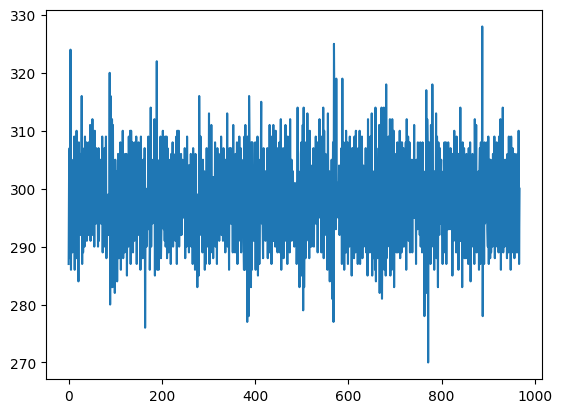

In [22]:
plt.plot(EMG[50:])
plt.show()
